# 09 Problem:
## In problem ninth our goal is to apply tree-based models, learn more about them.
## After it we'll apply two ensemble techniques: Bagging and Majority Voting

### The dataset that we'll use is [Pima Indians Diabetes Database](https://data.world/data-society/pima-indians-diabetes-database).

## 1 - Imports:

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import plot_tree

In [39]:
filename = '/home/joaocarvoli/Downloads/pima-indians-diabetes/diabetes.csv'
df = pd.read_csv(filename)

## 2 - Split and Stratification:

In [40]:
# Splitting of X and y based on dataframe df
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
X # Showing X values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [42]:
pd.DataFrame(y.value_counts()) # Showing y distribution

,Outcome
0,500
1,268


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32, stratify=y)

In [44]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
41,7,133,84,0,0,40.2,0.696,37
548,1,164,82,43,67,32.8,0.341,50
395,2,127,58,24,275,27.7,1.600,25
288,4,96,56,17,49,20.8,0.340,26
687,1,107,50,19,0,28.3,0.181,29
...,...,...,...,...,...,...,...,...
8,2,197,70,45,543,30.5,0.158,53
495,6,166,74,0,0,26.6,0.304,66
619,0,119,0,0,0,32.4,0.141,24
18,1,103,30,38,83,43.3,0.183,33


In [45]:
pd.DataFrame(y_train.value_counts()) # Showing y distribution after the stratification

,Outcome
0,400
1,214


#### `No scaled`

In [46]:
parameters = {
  'criterion':['gini', 'entropy'],
  'splitter': ['best', 'random'],
  'max_features':['auto', 'sqrt', 'log2', None],
  'random_state': [42] 
  }

dct_grid = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid = parameters, scoring = 'f1', cv = 5)

dct_grid.fit(X_train,y_train)
print(f'The best params are {dct_grid.best_params_}')
print(f'The best score based on f1-score is: {dct_grid.best_score_}')

The best params are {'criterion': 'gini', 'max_features': 'log2', 'random_state': 42, 'splitter': 'best'}
The best score based on f1-score is: 0.5709336072001724


#### `Std scaler`

In [47]:
pipeline = Pipeline([( "standardscaler" , StandardScaler()),            
                       ("decisionTree",DecisionTreeClassifier())])

parameters_std_tree = {
  'decisionTree__criterion':['gini', 'entropy'],
  'decisionTree__splitter': ['best', 'random'],
  'decisionTree__max_features':['auto', 'sqrt', 'log2', None],
  'decisionTree__random_state': [42] 
  }

grid_pipeline_2 = GridSearchCV(pipeline,parameters_std_tree, scoring = 'f1', cv = 5)

grid_pipeline_2.fit(X_train,y_train)
print(f'The best params are {grid_pipeline_2.best_params_}')
print(f'The best score based on f1-score is: {grid_pipeline_2.best_score_}')

The best params are {'decisionTree__criterion': 'gini', 'decisionTree__max_features': 'log2', 'decisionTree__random_state': 42, 'decisionTree__splitter': 'best'}
The best score based on f1-score is: 0.5707609903881782


#### `Min max scaler`

In [49]:
pipeline_2 = Pipeline([( "standardscaler" , MinMaxScaler()),            
                       ("decisionTree",DecisionTreeClassifier())])

grid_pipeline_3 = GridSearchCV(pipeline_2,parameters_std_tree, scoring = 'f1', cv = 5)

grid_pipeline_3.fit(X_train,y_train)
print(f'The best params are {grid_pipeline_3.best_params_}')
print(f'The best score based on f1-score is: {grid_pipeline_3.best_score_}')

The best params are {'decisionTree__criterion': 'gini', 'decisionTree__max_features': 'log2', 'decisionTree__random_state': 42, 'decisionTree__splitter': 'best'}
The best score based on f1-score is: 0.5708980052720285


## Let's plot a tree!

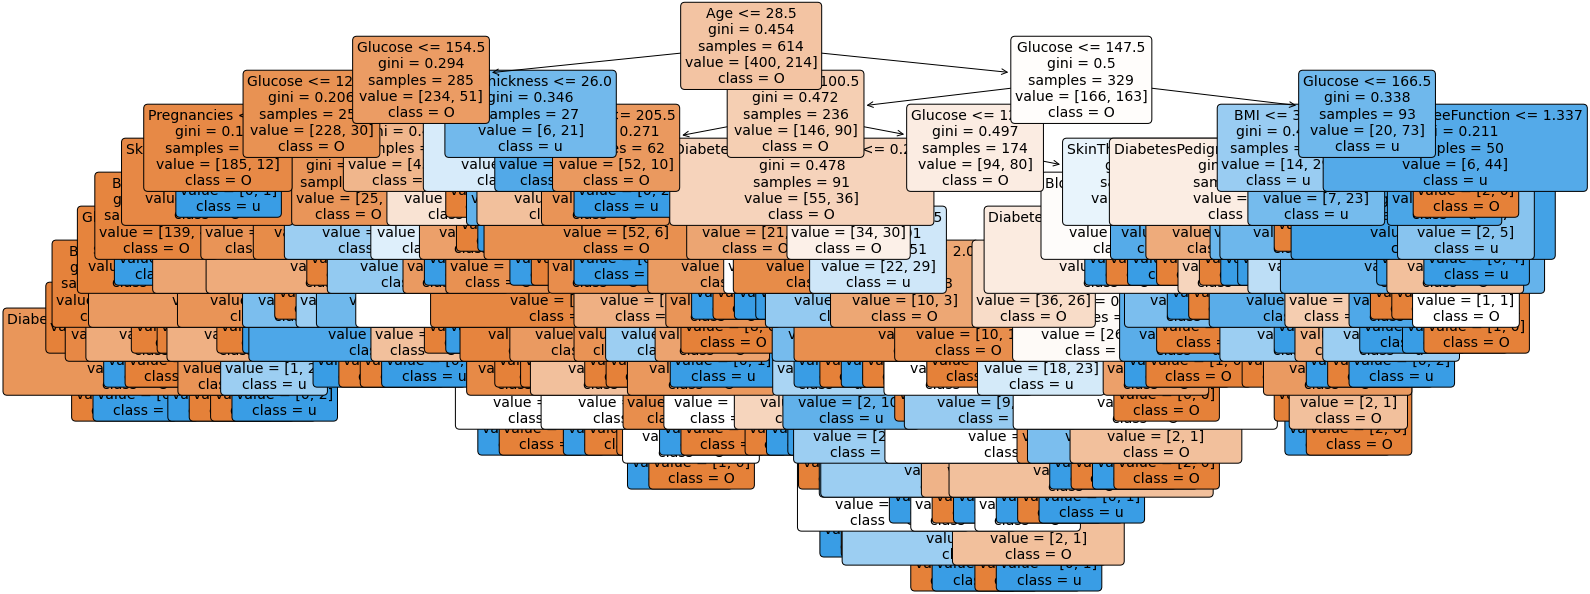

In [50]:
clf = DecisionTreeClassifier(criterion = 'gini', max_features = 'log2', random_state =  42, splitter = 'best').fit(X_train, y_train)
plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=X.columns, 
              class_names=df.columns[8], 
              filled=True, 
              rounded=True, 
              fontsize=14)

#### After seeing three models, one unscaled, one standard scaled, and one scaled min-max. We will see the importance of your features, training with the best parameters.

## 3 - Feature importance:

In [51]:
model_un = DecisionTreeClassifier(max_features = 'log2', random_state = 42).fit(X_train,y_train)
print(f'The features importance is: {model_un.feature_importances_}')

The features importance is: [0.07979856 0.31027946 0.09068105 0.06455637 0.04832834 0.12895751
 0.10889618 0.16850255]


## 4 - Ensemble Techniques:

### `Majority Vote Classifier`

In [52]:
parameters = {
  'criterion':['gini', 'entropy'],
  'splitter': ['best', 'random'],
  'max_features':['auto', 'sqrt', 'log2', None],
  'random_state': [42],
 
  }

majorclass_grid_DCT = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = parameters, scoring = 'f1')

majorclass_grid_DCT.fit(X_train,y_train)
print(majorclass_grid_DCT.best_params_)

{'criterion': 'gini', 'max_features': 'log2', 'random_state': 42, 'splitter': 'best'}


In [53]:

parameters_2 = {
  'criterion':['gini','entropy'],
  'max_features':['auto', 'sqrt', 'log2'],
  'n_jobs':[-1],
  'random_state': [42],
  'class_weight': ['balanced', 'balanced_subsample'],
}

majorclass_grid_randT = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters_2, scoring = 'f1')
majorclass_grid_randT.fit(X_train,y_train)
print(majorclass_grid_randT.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'n_jobs': -1, 'random_state': 42}


In [54]:

parameters_3 = {
  'loss':['deviance'],
  'random_state': [42],
  'max_features':['auto', 'sqrt', 'log2'],
}

majorclass_grid_gradB = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = parameters_3, scoring = 'f1')
majorclass_grid_gradB.fit(X_train,y_train)
print(majorclass_grid_gradB.best_params_)

{'loss': 'deviance', 'max_features': 'sqrt', 'random_state': 42}


### Aplying the best models in voting classifier:

In [55]:
decisionTree = DecisionTreeClassifier(criterion = 'gini', max_features = 'log2', random_state= 42, splitter = 'best')
randomForest = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy', max_features = 'auto', n_jobs = -1, random_state = 42)
grandientBosting = GradientBoostingClassifier(loss = 'deviance', max_features = 'sqrt', random_state = 42)


# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [
    ('Decision Tree', decisionTree), 
    ('Random Forest', randomForest), 
    ('Gradient Bosting', grandientBosting)
]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, f1_score(y_test, y_pred)),'\n', 'and', 'The feature importances is: ','\n', clf.feature_importances_,'\n')

Decision Tree : 0.531 
 and The feature importances is:  
 [0.07979856 0.31027946 0.09068105 0.06455637 0.04832834 0.12895751
 0.10889618 0.16850255] 

Random Forest : 0.628 
 and The feature importances is:  
 [0.08322843 0.24959227 0.09483436 0.06663581 0.07075362 0.1651318
 0.12522659 0.14459712] 

Gradient Bosting : 0.621 
 and The feature importances is:  
 [0.07197971 0.35166865 0.0390665  0.03491454 0.05294706 0.16806922
 0.11489843 0.16645589] 



In [56]:
vc = VotingClassifier(estimators=classifiers, voting = 'hard')
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print('The Voting Classifier by majority is: {:.3f}%'.format(f1_score(y_test, y_pred)*(100)))

The Voting Classifier by majority is: 60.465%


### `Bagging Classifier`

In [57]:
# Adabosting classifier

bagging_abc = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = {'random_state':[42], 'algorithm':['SAMME','SAMME.R']}, scoring = 'f1').fit(X_train,y_train)
bagging_abc.best_params_

{'algorithm': 'SAMME', 'random_state': 42}

In [58]:
abc = AdaBoostClassifier(algorithm = 'SAMME', random_state = 42).fit(X_train,y_train)
abc.feature_importances_

array([0.03200562, 0.26743976, 0.02164908, 0.        , 0.02715978,
       0.16065974, 0.20939951, 0.28168651])

### Aplying the best models in bagging classifier:

In [59]:
models_bagging = ['dct','ran','grad','abc']
results_bagging = {'f1_score':[]}

for model in models_bagging:
    if model == 'dct':
        dt = DecisionTreeClassifier(criterion = 'gini', max_features = 'log2', random_state= 42, splitter = 'best')
        bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
    elif model == 'ran':
        dt = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy', max_features = 'auto', n_jobs = -1, random_state = 42)
        bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
    elif model == 'grad':
        dt = GradientBoostingClassifier(loss = 'deviance', max_features = 'sqrt', random_state = 42)
        bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
    else:
        dt = AdaBoostClassifier(algorithm = 'SAMME', random_state = 42)
        bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
    
    
    bc.fit(X_train, y_train)
    y_pred = bc.predict(X_test)
    results_bagging['f1_score'].append(f1_score(y_test, y_pred))
    #results_bagging['feature importances'].append(bc.feature_importances_)

In [61]:
pd.DataFrame.from_dict(results_bagging).sort_values(by = 'f1_score', ascending=False)

,f1_score
1,0.659091
0,0.636364
2,0.613636
3,0.604651
